In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
auctions = pd.read_csv("data/auctions.csv.gzip", parse_dates=['date'])
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [52]:
auctions.memory_usage()

Index                     80
auction_type_id    156570552
country            156570552
date               156570552
device_id          156570552
platform           156570552
ref_type_id        156570552
source_id          156570552
dtype: int64

In [53]:
auctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
dtype: int64

In [54]:
auctions = auctions.drop('auction_type_id', axis=1)

In [55]:
auctions.describe()

,country,device_id,platform,ref_type_id,source_id
count,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07,1.957132e+07
mean,6.333597e+18,4.599151e+18,1.205888e+00,2.235326e+00,6.857898e-01
std,3.016674e+09,2.667138e+18,4.043488e-01,2.426093e+00,1.416215e+00
min,6.333597e+18,1.138588e+14,1.000000e+00,1.000000e+00,0.000000e+00
25%,6.333597e+18,2.258716e+18,1.000000e+00,1.000000e+00,0.000000e+00
50%,6.333597e+18,4.616600e+18,1.000000e+00,1.000000e+00,0.000000e+00
75%,6.333597e+18,6.911427e+18,1.000000e+00,1.000000e+00,1.000000e+00
max,6.333597e+18,9.223339e+18,2.000000e+00,7.000000e+00,6.000000e+00


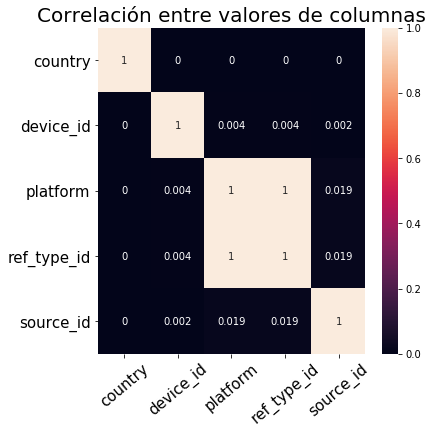

In [56]:
auctions_corr = auctions.corr().abs().round(3)
plt.figure(figsize=(6, 6))
ax = sns.heatmap(auctions_corr, annot=True);
plt.title("Correlación entre valores de columnas", size=20)
ax.tick_params(labelsize=15)
ax.tick_params(axis='x', rotation=40)
ax.tick_params(axis='y', rotation=0)
plt.savefig('images/auctions_corr.png', bbox_inches = 'tight', pad_inches = 0.1)

In [57]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [58]:
auctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [59]:
auctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [60]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [61]:
auctions.loc[:,'platform'] = pd.Categorical(auctions['platform'])
auctions.loc[:,'ref_type_id'] = pd.Categorical(auctions['ref_type_id'])
auctions.loc[:,'source_id'] = pd.Categorical(auctions['source_id'])

In [62]:
auctions.memory_usage()

Index                 80
country        156570552
date           156570552
device_id      156570552
platform        19571415
ref_type_id     19571415
source_id       19571519
dtype: int64

D:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


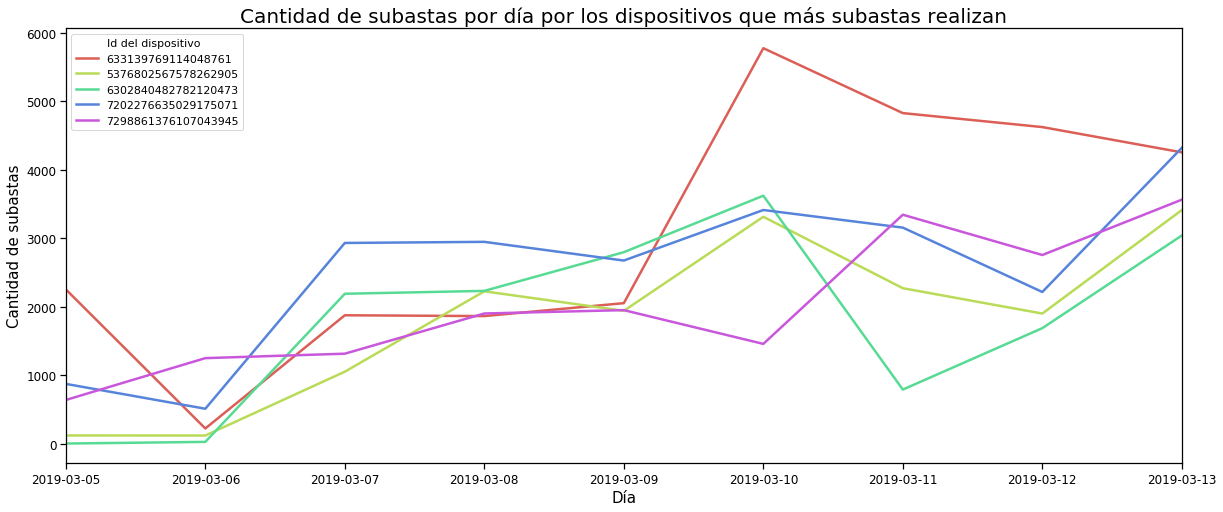

In [63]:
gb = auctions.groupby('device_id').size().nlargest(5)
top_auctions = auctions.loc[auctions['device_id'].isin(gb.keys())]
top_auctions.loc[:, 'date'] = top_auctions['date'].dt.date

top_auctions_ = top_auctions.groupby(['device_id', 'date']).size().to_frame().reset_index()
top_auctions_.set_index('device_id')
top_auctions_.columns = ['device_id', 'date', 'count']

with sns.plotting_context("notebook", rc={"lines.linewidth": 2.5}):
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.margins(x=0)
    ax.tick_params(axis='both', labelsize=12)
    sns.lineplot(x="date", y="count",
             palette=sns.color_palette("hls", 5),
             hue='device_id',
             data=top_auctions_, ax=ax, legend="full")
    plt.title("Cantidad de subastas por día por los dispositivos que más subastas realizan",size=20)
    ax.legend().texts[0].set_text("Id del dispositivo")
    ax.set_ylabel('Cantidad de subastas',size=15);
    ax.set_xlabel('Día',size=15);
plt.savefig('images/auctions_top5_each_day.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [64]:
auctions['hour'] = auctions['date'].dt.hour
auctions['day'] = auctions['date'].dt.date

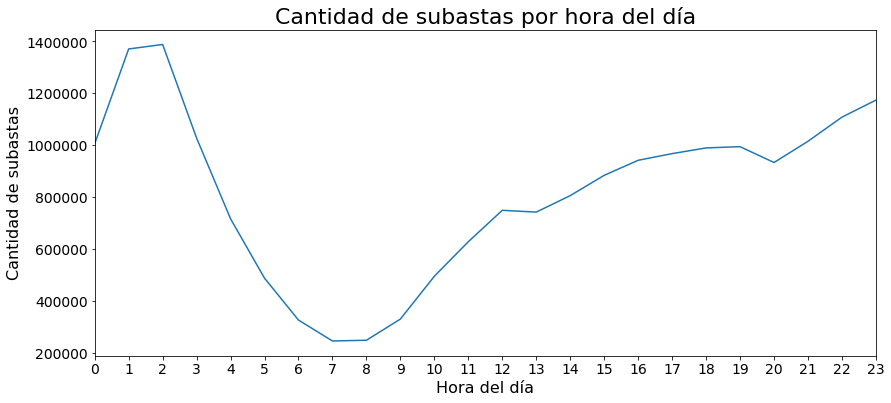

In [65]:
fig, ax = plt.subplots()
auctions.groupby('hour').size().plot(figsize=(14,6))
plt.title("Cantidad de subastas por hora del día", size=22)
ax.set_ylabel('Cantidad de subastas', size=16);
ax.set_xlabel('Hora del día', size=16);
ax.tick_params(labelsize=14)
plt.xticks(range(0,24,1));
plt.savefig('images/auctions_each_day.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

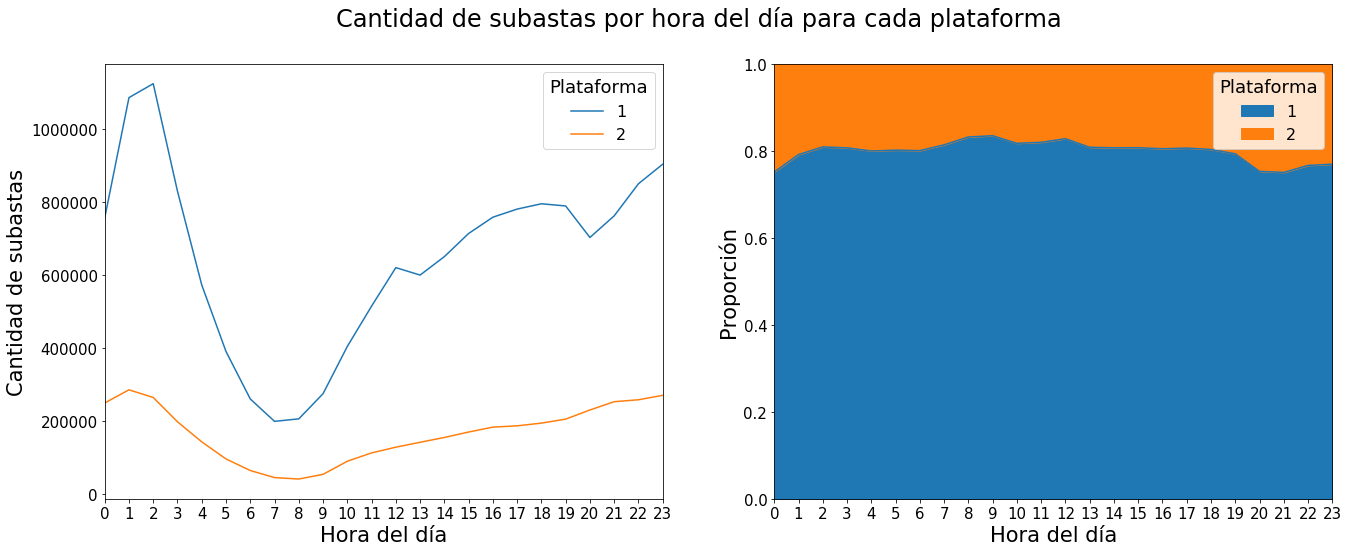

In [66]:
gb = auctions.groupby(['hour', 'platform']).size()
auctions_ = gb.reset_index()
auctions_.columns = ['hour', 'platform', 'count']
percentages = gb.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
percentages.columns = ['hour', 'platform', 'freq']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,8))
fig.suptitle('Cantidad de subastas por hora del día para cada plataforma', size=24)
gb = auctions.groupby(['platform'])
for key, grp in gb:
    grp.groupby('hour').size().plot(ax=ax1, kind='line', label=key)
ax1.legend(title='Plataforma', prop={'size': 16})
ax1.set_ylabel('Cantidad de subastas', size=21)
ax1.set_xlabel('Hora del día', size=21)
ax1.set_xticks(range(0,24,1))
plt.setp(ax1.get_legend().get_title(),fontsize=18)
ax1.tick_params(labelsize=15)

ax2.margins(y=0)
percentages.pivot_table(index='hour', columns='platform', values='freq').plot(ax=ax2, kind='area')
plt.legend(title='Plataforma', prop={'size': 16})
ax2.set_ylabel('Proporción', size=21)
ax2.set_xlabel('Hora del día', size=21)
ax2.set_xticks(range(0,24,1))
plt.setp(ax2.get_legend().get_title(),fontsize=18)
ax2.tick_params(labelsize=15)

plt.savefig('images/auctions_by_platform_hour.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

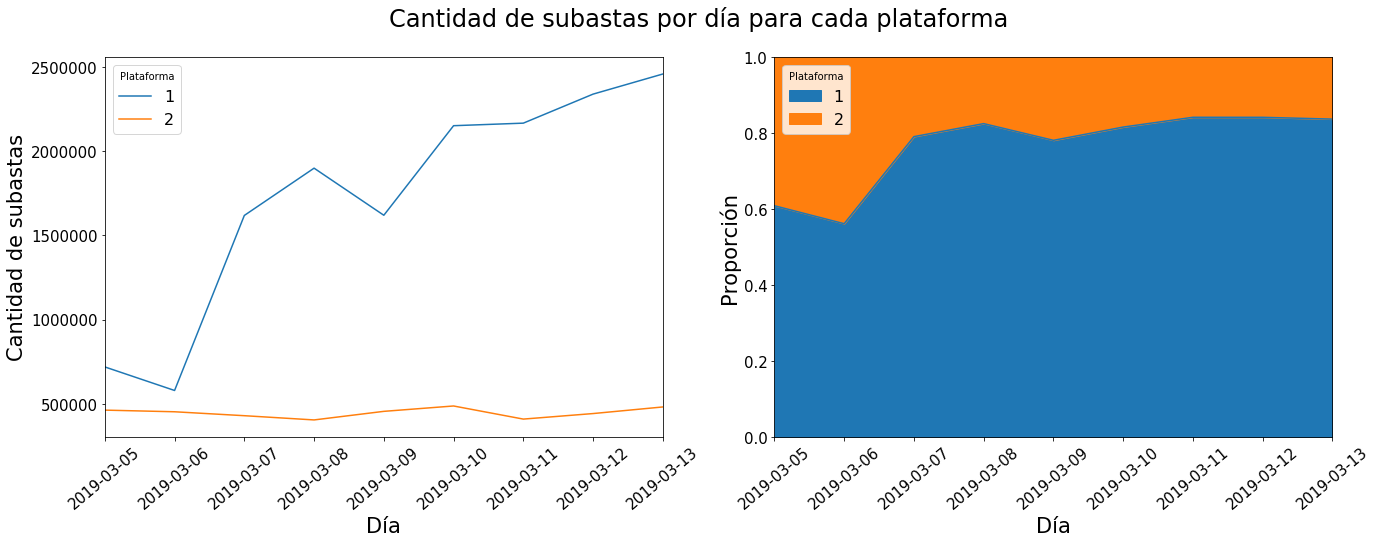

In [67]:
gb = auctions.groupby(['day', 'platform']).size()
auctions_ = gb.reset_index()
auctions_.columns = ['day', 'platform', 'count']
percentages = gb.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
percentages.columns = ['day', 'platform', 'freq']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22,7))
fig.suptitle('Cantidad de subastas por día para cada plataforma', size=24)
gb = auctions.groupby(['platform'])
for key, grp in gb:
    grp.groupby('day').size().plot(ax=ax1, kind='line', label=key)
ax1.legend(title='Plataforma', prop={'size': 16})
ax1.set_ylabel('Cantidad de subastas', size=21);
ax1.set_xlabel('Día', size=21);
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='x', rotation=40)

ax2.margins(y=0)
percentages.pivot_table(index='day', columns='platform', values='freq').plot(ax=ax2, kind='area')
plt.legend(title='Plataforma', prop={'size': 16})
ax2.set_ylabel('Proporción', size=21)
ax2.set_xlabel('Día', size=21)
ax2.tick_params(labelsize=15)
ax2.tick_params(axis='x', rotation=40)
plt.savefig('images/auctions_by_platform_day.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [97]:
df = auctions.groupby(['device_id', 'source_id']).agg('size').reset_index()
df.columns = ['device_id', 'source_id', 'single_count']
df = df.sort_values("single_count", axis = 0, ascending = False)
top_auction_source_count = df.groupby('device_id').first()['single_count'].sum()
total_auction_count = df['single_count'].sum()
other_auction_count = total_auction_count - top_auction_source_count
top_auction_perc = round((top_auction_source_count / total_auction_count) * 100, 2)
other_auction_perc = round((other_auction_count / total_auction_count) * 100, 2)

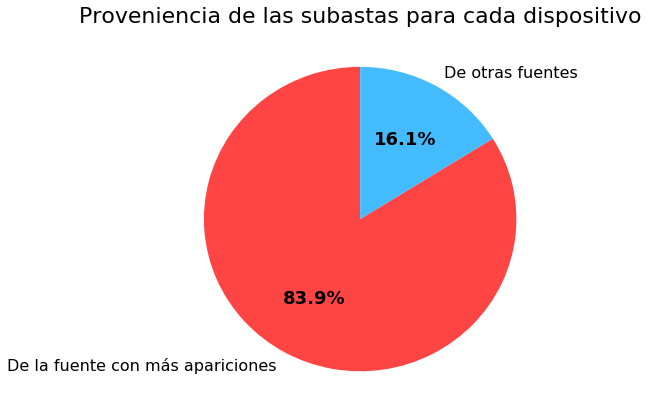

In [100]:
fig, ax = plt.subplots(figsize=(7, 7))

labels = 'De la fuente con más apariciones', 'De otras fuentes'
sizes = [top_auction_perc, other_auction_perc]
colors = ['#ff4444', '#44bbff']
explode = (0, 0)
 
patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)
ax.set_title("Proveniencia de las subastas para cada dispositivo", size=22)
plt.setp(autotexts, size=18, weight="bold")
plt.setp(texts, size=16)
plt.savefig('images/auctions_platforms_appereances.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()